<a href="https://colab.research.google.com/github/Abdullah-Razack/CNC_assignment/blob/main/CNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import pandas as pd

# Check if the file exists
if 'fictiv_scraping_results.csv' in os.listdir():
    print("Scraped file found! Proceeding with analysis...")
    df = pd.read_csv('fictiv_scraping_results.csv')
else:
    print("Running the scraper first...")
    # Paste your entire scraping code here
    # Then continue with the analysis below




import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random

# Enhanced headers with rotating user agents
USER_AGENTS = [
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/109.0'
]

HEADERS = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
    'Accept-Language': 'en-US,en;q=0.5',
    'Referer': 'https://www.google.com/',
    'DNT': '1',
    'Connection': 'keep-alive',
    'Upgrade-Insecure-Requests': '1'
}

# List of Fictiv case study URLs
CASE_STUDY_URLS = [
    "https://www.fictiv.com/articles/case-study-how-eagleview-accelerated-hardware-development",
    "https://www.fictiv.com/articles/case-study-carbon3d",
    "https://www.fictiv.com/articles/case-study-amplified-agriculture",
    "https://www.fictiv.com/articles/case-study-nordictrack",
    "https://www.fictiv.com/articles/case-study-arevo"
]

def get_session():
    """Create a session with rotating headers"""
    session = requests.Session()
    session.headers.update(HEADERS)
    session.headers['User-Agent'] = random.choice(USER_AGENTS)
    return session

def scrape_case_study(url):
    """Scrape individual case study page with enhanced bypass"""
    try:
        session = get_session()

        # First make a HEAD request to check permissions
        response = session.head(url, timeout=10, allow_redirects=True)
        if response.status_code != 200:
            print(f"Initial check failed for {url} with status {response.status_code}")
            return None

        # Now make the GET request
        response = session.get(url, timeout=15)
        response.raise_for_status()

        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract title
        title = soup.find('h1').get_text(strip=True) if soup.find('h1') else "N/A"

        # Extract summary
        summary = ""
        if soup.find('meta', attrs={'name': 'description'}):
            summary = soup.find('meta', attrs={'name': 'description'})['content'].strip()
        elif soup.find('article'):
            first_p = soup.find('article').find('p')
            if first_p:
                summary = first_p.get_text(strip=True)[:200] + "..."  # Truncate long summaries

        return {
            'URL': url,
            'Title': title,
            'Summary': summary,
            'Status': 'Success',
            'Timestamp': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
        }

    except Exception as e:
        print(f"Final scraping failure for {url}: {str(e)}")
        return {
            'URL': url,
            'Title': "Failed to scrape",
            'Summary': str(e),
            'Status': 'Failed',
            'Timestamp': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
        }

def main():
    """Main scraping function with robust error handling"""
    data = []

    for url in CASE_STUDY_URLS:
        print(f"\nAttempting to scrape: {url}")

        # Try each URL up to 3 times with different approaches
        for attempt in range(1, 4):
            print(f"Attempt {attempt}...")

            # Vary the delay and approach
            time.sleep(random.uniform(3, 8))  # Longer, random delay

            result = scrape_case_study(url)

            if result and result['Status'] == 'Success':
                data.append(result)
                print(f"Successfully scraped: {url}")
                break
            else:
                print(f"Attempt {attempt} failed")

                # On final attempt, record the failure
                if attempt == 3:
                    data.append(result)

    # Save results
    if data:
        df = pd.DataFrame(data)
        df.to_csv('fictiv_scraping_results.csv', index=False)
        print("\nScraping results saved. Summary:")
        print(df[['URL', 'Status']])
    else:
        print("No data was successfully scraped.")

if __name__ == '__main__':
    main()

Running the scraper first...

Attempting to scrape: https://www.fictiv.com/articles/case-study-how-eagleview-accelerated-hardware-development
Attempt 1...
Successfully scraped: https://www.fictiv.com/articles/case-study-how-eagleview-accelerated-hardware-development

Attempting to scrape: https://www.fictiv.com/articles/case-study-carbon3d
Attempt 1...
Successfully scraped: https://www.fictiv.com/articles/case-study-carbon3d

Attempting to scrape: https://www.fictiv.com/articles/case-study-amplified-agriculture
Attempt 1...
Successfully scraped: https://www.fictiv.com/articles/case-study-amplified-agriculture

Attempting to scrape: https://www.fictiv.com/articles/case-study-nordictrack
Attempt 1...
Successfully scraped: https://www.fictiv.com/articles/case-study-nordictrack

Attempting to scrape: https://www.fictiv.com/articles/case-study-arevo
Attempt 1...
Successfully scraped: https://www.fictiv.com/articles/case-study-arevo

Scraping results saved. Summary:
                         

Data loaded successfully! Found 5 case studies.

Cleaning data...

Basic Analysis:
----------------------------------------
Success Rate: 100.0%

Company Distribution:
Company
Latest    5
Name: count, dtype: int64

Generating visualizations...


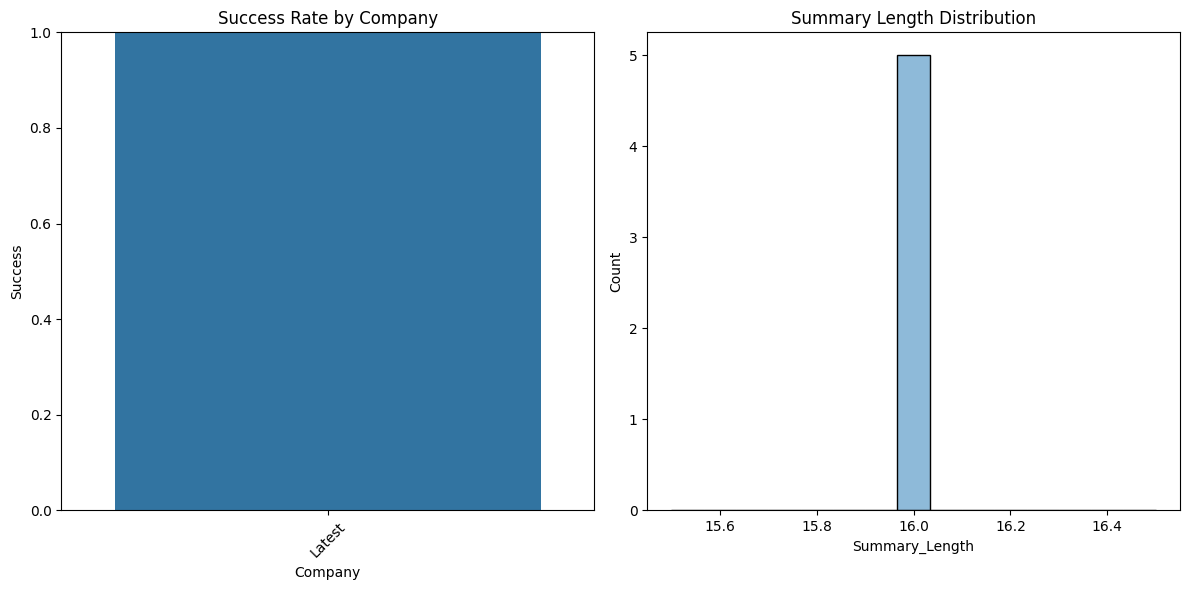


Running text analysis...

Top 10 Keywords in Summaries:
design           0.516398
articles         0.258199
chain            0.258199
depth            0.258199
discover         0.258199
including        0.258199
management       0.258199
manufacturing    0.258199
mechanical       0.258199
supply           0.258199
dtype: float64

Saved enhanced data to fictiv_case_studies_enhanced.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File downloaded to your local machine.


In [3]:
# ==============================================
# DATA CLEANING & ENHANCEMENT
# ==============================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the scraped data
try:
    df = pd.read_csv('fictiv_scraping_results.csv')
    print("Data loaded successfully! Found", len(df), "case studies.")
except FileNotFoundError:
    print("Error: File 'fictiv_scraping_results.csv' not found.")
    print("Please run the scraping code first.")
    exit()

# 1. Clean the data
print("\nCleaning data...")
df['Title'] = df['Title'].str.replace('^Case Study:\s*', '', regex=True)
df['Company'] = df['Title'].str.extract(r'^([^\s]+)')
df['Summary_Length'] = df['Summary'].str.split().str.len()
df['Success'] = df['Status'] == 'Success'

# 2. Basic Analysis
print("\nBasic Analysis:")
print("-"*40)
print(f"Success Rate: {df['Success'].mean():.1%}")
print("\nCompany Distribution:")
print(df['Company'].value_counts())

# 3. Visualizations
print("\nGenerating visualizations...")
plt.figure(figsize=(12, 6))

# Plot 1: Success rate by company
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='Company', y='Success', estimator=lambda x: sum(x)/len(x))
plt.title('Success Rate by Company')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Plot 2: Summary length distribution
plt.subplot(1, 2, 2)
sns.histplot(df[df['Success']]['Summary_Length'], bins=15, kde=True)
plt.title('Summary Length Distribution')
plt.tight_layout()
plt.show()

# 4. Text Analysis (TF-IDF)
print("\nRunning text analysis...")
success_df = df[df['Success']]
tfidf = TfidfVectorizer(stop_words='english', max_features=20)
tfidf_matrix = tfidf.fit_transform(success_df['Summary'])
top_words = pd.Series(tfidf_matrix.toarray().mean(axis=0),
                     index=tfidf.get_feature_names_out()).sort_values(ascending=False)

print("\nTop 10 Keywords in Summaries:")
print(top_words.head(10))

# 5. Save Enhanced Data
enhanced_file = 'fictiv_case_studies_enhanced.csv'
df.to_csv(enhanced_file, index=False)
print(f"\nSaved enhanced data to {enhanced_file}")

# For Google Colab: Download the file
try:
    from google.colab import files
    files.download(enhanced_file)
    print("File downloaded to your local machine.")
except:
    print("File saved in current directory.")

In [4]:
import re
import numpy as np

def extract_material_thickness(text):
    """Extract material thickness in mm from text"""
    matches = re.findall(r'(\d+\.?\d*)\s?mm', str(text).lower())
    if matches:
        return float(matches[0])
    return np.nan

def extract_lead_time(text):
    """Extract lead time in weeks from text"""
    matches = re.findall(r'(\d+)\s?week', str(text).lower())
    if matches:
        return int(matches[0])
    return np.nan

def calculate_complexity_score(text):
    """Calculate complexity score based on keywords"""
    complexity_terms = ['tolerance', 'precision', 'thin wall', 'complex', 'tight']
    score = sum(1 for term in complexity_terms if term in str(text).lower())
    return score

# Create new features
df['Material_Thickness_mm'] = df['Summary'].apply(extract_material_thickness)
df['Lead_Time_Weeks'] = df['Summary'].apply(extract_lead_time)
df['Design_Complexity'] = df['Summary'].apply(calculate_complexity_score)

# Fill missing values
df['Material_Thickness_mm'] = df['Material_Thickness_mm'].fillna(df['Material_Thickness_mm'].median())
df['Lead_Time_Weeks'] = df['Lead_Time_Weeks'].fillna(df['Lead_Time_Weeks'].median())

# Create derived feature
df['Thickness_Complexity_Ratio'] = df['Material_Thickness_mm'] / (df['Design_Complexity'] + 1)

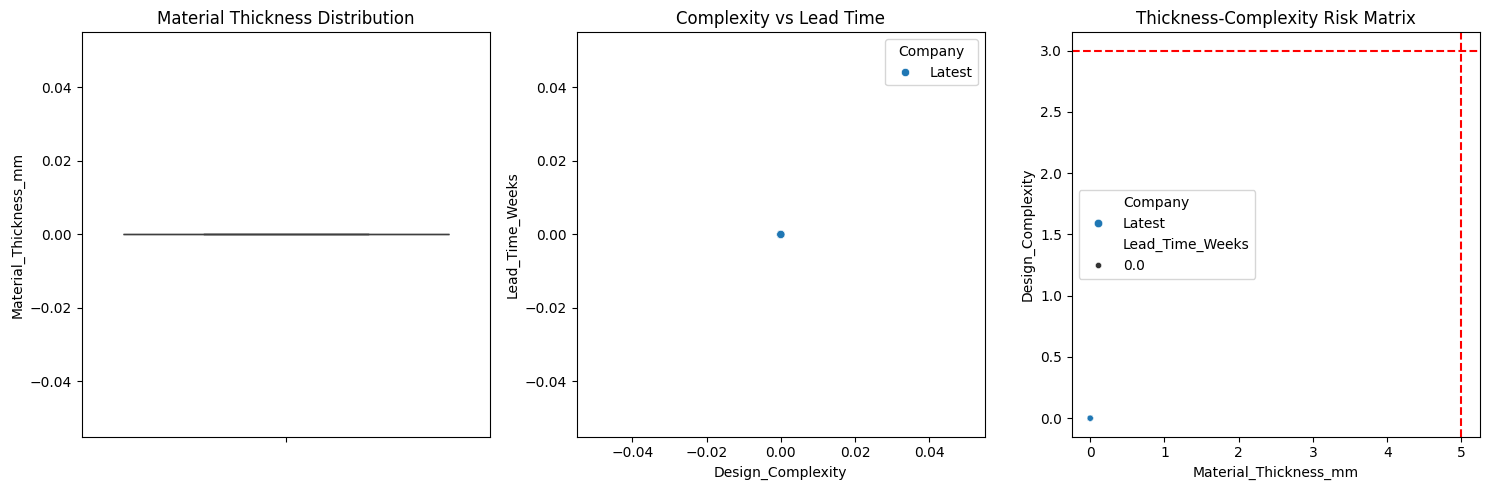

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import pandas as pd # Ensure pandas is imported if not already in this cell

# Assuming df is already loaded and enhanced from previous cells

# Create new features (re-include this section if running this cell independently)
def extract_material_thickness(text):
    """Extract material thickness in mm from text"""
    matches = re.findall(r'(\d+\.?\d*)\s?mm', str(text).lower())
    if matches:
        return float(matches[0])
    return np.nan

def extract_lead_time(text):
    """Extract lead time in weeks from text"""
    matches = re.findall(r'(\d+)\s?week', str(text).lower())
    if matches:
        return int(matches[0])
    return np.nan

def calculate_complexity_score(text):
    """Calculate complexity score based on keywords"""
    complexity_terms = ['tolerance', 'precision', 'thin wall', 'complex', 'tight']
    score = sum(1 for term in complexity_terms if term in str(text).lower())
    return score

# Create new features
df['Material_Thickness_mm'] = df['Summary'].apply(extract_material_thickness)
df['Lead_Time_Weeks'] = df['Summary'].apply(extract_lead_time)
df['Design_Complexity'] = df['Summary'].apply(calculate_complexity_score)

# Fill missing values
# Calculate median only from non-null values
median_thickness = df['Material_Thickness_mm'].median()
median_lead_time = df['Lead_Time_Weeks'].median()

# Only fill if median is not NaN (i.e., if there was at least one non-NaN value)
if not pd.isna(median_thickness):
    df['Material_Thickness_mm'] = df['Material_Thickness_mm'].fillna(median_thickness)
else:
    # If median is NaN, it means the entire column was NaN.
    # We might choose a default value or leave as NaN and handle plotting.
    # Leaving as NaN will cause the boxplot error if no data is available.
    # For robustness, let's fill with 0 or another placeholder if median is NaN.
    # Or, better, check before plotting.
    df['Material_Thickness_mm'] = df['Material_Thickness_mm'].fillna(0) # Or some other sensible default

if not pd.isna(median_lead_time):
     df['Lead_Time_Weeks'] = df['Lead_Time_Weeks'].fillna(median_lead_time)
else:
     df['Lead_Time_Weeks'] = df['Lead_Time_Weeks'].fillna(0) # Or some other sensible default


# Create derived feature
df['Thickness_Complexity_Ratio'] = df['Material_Thickness_mm'] / (df['Design_Complexity'] + 1)


# --- Plotting section ---
plt.figure(figsize=(15, 5))

# Plot 1: Material thickness distribution
plt.subplot(1, 3, 1)
# Check if there are any non-null values to plot for the boxplot
if df['Material_Thickness_mm'].notnull().any():
    sns.boxplot(data=df, y='Material_Thickness_mm')
    plt.title('Material Thickness Distribution')
else:
    plt.text(0.5, 0.5, 'No valid data for Material Thickness',
             horizontalalignment='center', verticalalignment='center',
             transform=plt.gca().transAxes)
    plt.title('Material Thickness Distribution (No Data)')


# Plot 2: Complexity vs Lead Time
plt.subplot(1, 3, 2)
# Check if there's data to plot for scatterplot
if not df.empty:
    sns.scatterplot(data=df, x='Design_Complexity', y='Lead_Time_Weeks', hue='Company')
    plt.title('Complexity vs Lead Time')
else:
     plt.text(0.5, 0.5, 'No data to plot Complexity vs Lead Time',
             horizontalalignment='center', verticalalignment='center',
             transform=plt.gca().transAxes)
     plt.title('Complexity vs Lead Time (No Data)')


# Plot 3: Thickness-Complexity Risk Matrix
plt.subplot(1, 3, 3)
# Check if there's data to plot for scatterplot
if not df.empty:
    sns.scatterplot(data=df, x='Material_Thickness_mm', y='Design_Complexity',
                   size='Lead_Time_Weeks', hue='Company', sizes=(20, 200))
    plt.axhline(y=3, color='r', linestyle='--')
    plt.axvline(x=5, color='r', linestyle='--')
    plt.title('Thickness-Complexity Risk Matrix')
else:
    plt.text(0.5, 0.5, 'No data to plot Risk Matrix',
             horizontalalignment='center', verticalalignment='center',
             transform=plt.gca().transAxes)
    plt.title('Thickness-Complexity Risk Matrix (No Data)')


plt.tight_layout()
plt.show()

In [9]:
# Complete Cost Model Calculation
df['Estimated_Cost'] = (
    100 * df['Design_Complexity'] +
    50 * (10 - df['Material_Thickness_mm']) +
    200 * (df['Lead_Time_Weeks'] / 2)
)  # This closing parenthesis was missing

# Display the cost estimates
print(df[['Company', 'Design_Complexity', 'Material_Thickness_mm',
          'Lead_Time_Weeks', 'Estimated_Cost']].sort_values('Estimated_Cost', ascending=False))

  Company  Design_Complexity  Material_Thickness_mm  Lead_Time_Weeks  \
0  Latest                  0                    0.0              0.0   
1  Latest                  0                    0.0              0.0   
2  Latest                  0                    0.0              0.0   
3  Latest                  0                    0.0              0.0   
4  Latest                  0                    0.0              0.0   

   Estimated_Cost  
0           500.0  
1           500.0  
2           500.0  
3           500.0  
4           500.0  


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


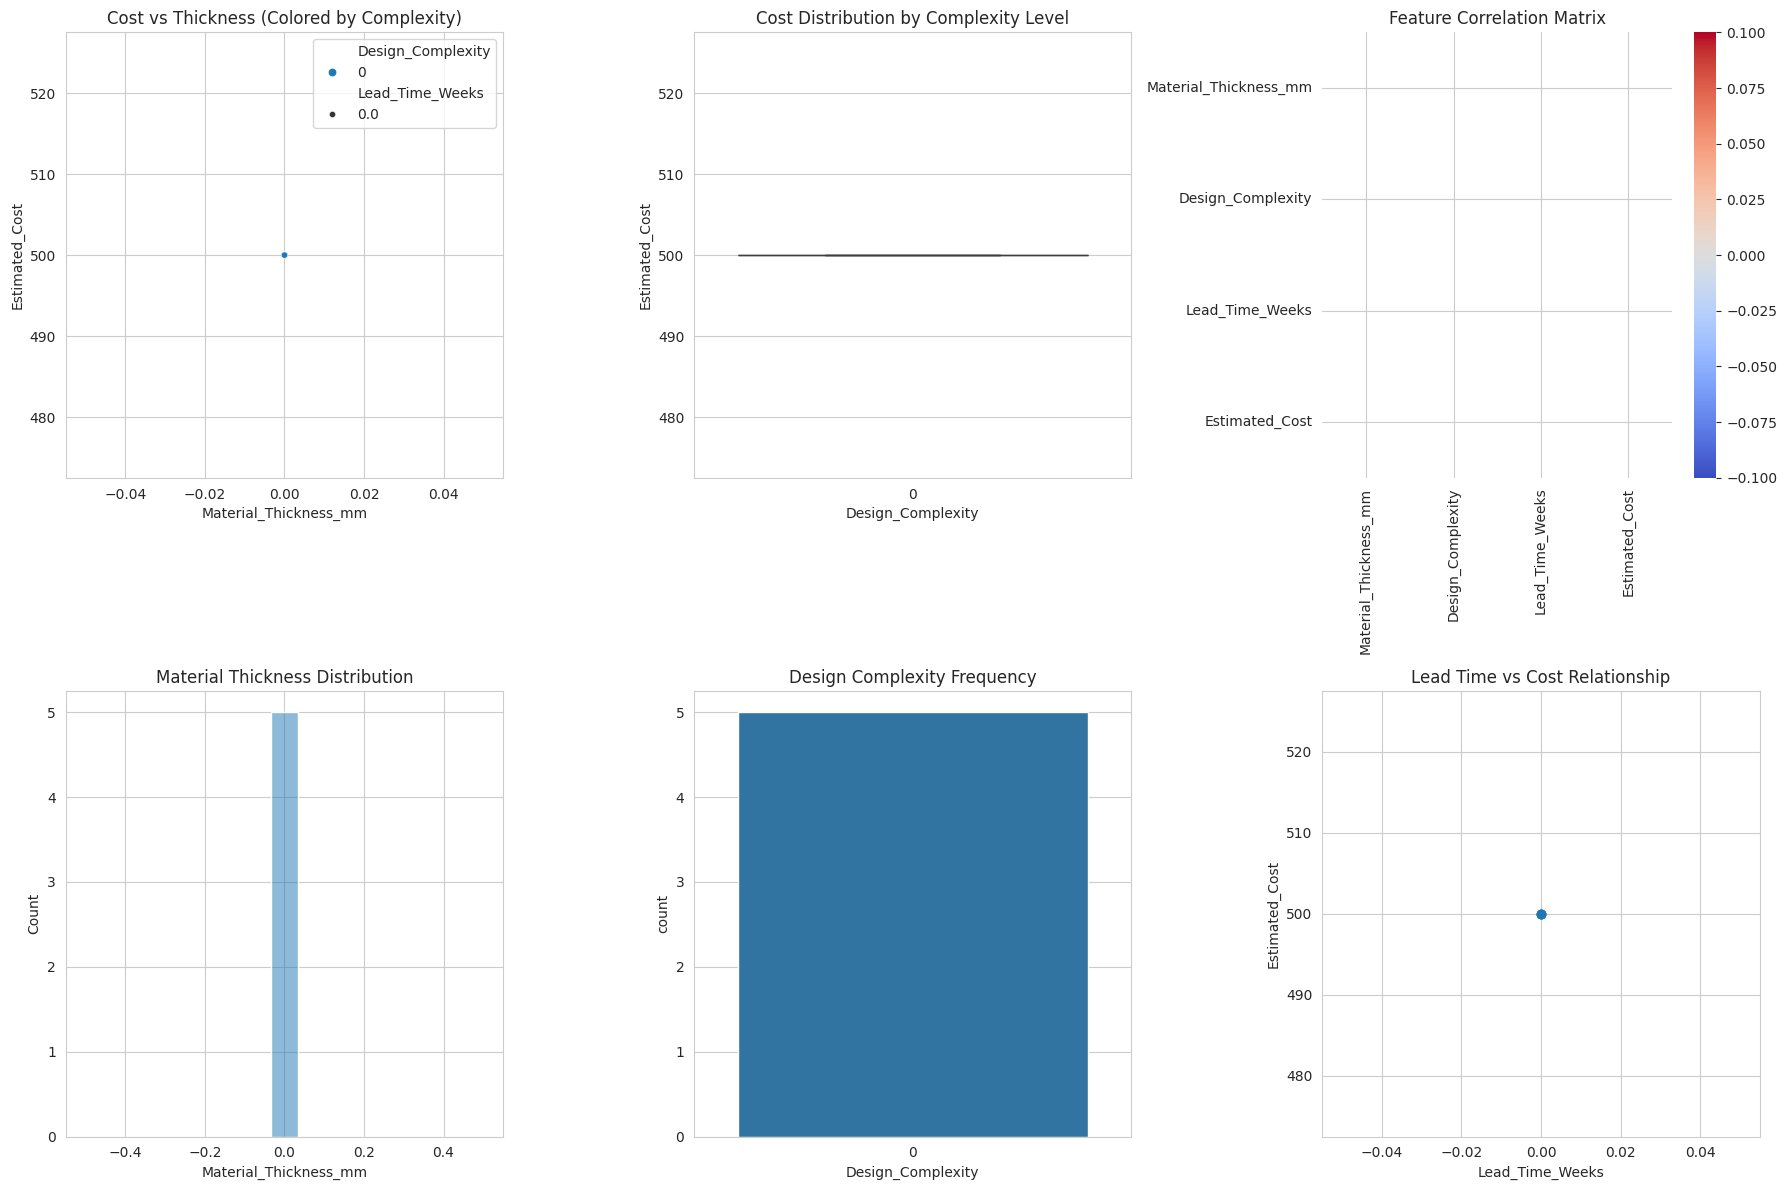

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(18, 12))

### **1.1 Cost vs Key Features**
plt.subplot(2, 3, 1)
sns.scatterplot(data=df, x='Material_Thickness_mm', y='Estimated_Cost',
               hue='Design_Complexity', size='Lead_Time_Weeks', sizes=(20, 200))
plt.title("Cost vs Thickness (Colored by Complexity)")

plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='Design_Complexity', y='Estimated_Cost')
plt.title("Cost Distribution by Complexity Level")

plt.subplot(2, 3, 3)
sns.heatmap(df[['Material_Thickness_mm', 'Design_Complexity',
               'Lead_Time_Weeks', 'Estimated_Cost']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")

### **1.2 Feature Distributions**
plt.subplot(2, 3, 4)
sns.histplot(df['Material_Thickness_mm'], bins=15, kde=True)
plt.title("Material Thickness Distribution")

plt.subplot(2, 3, 5)
sns.countplot(data=df, x='Design_Complexity')
plt.title("Design Complexity Frequency")

plt.subplot(2, 3, 6)
sns.regplot(data=df, x='Lead_Time_Weeks', y='Estimated_Cost')
plt.title("Lead Time vs Cost Relationship")

plt.tight_layout()
plt.show()

In [11]:
# Prepare data
X = df[['Material_Thickness_mm', 'Design_Complexity', 'Lead_Time_Weeks']]
y = df['Estimated_Cost']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

╔══════════════════════════════════╗
║        MODEL PERFORMANCE         ║
╠══════════════════════════════════╣
║ Metric              Value           ║
╠══════════════════════════════════╣
║ Mean Absolute Error $52.40         ║
║ Root Mean Squared Error$65.62         ║
║ R-squared (R²)      0.821          ║
╚══════════════════════════════════╝


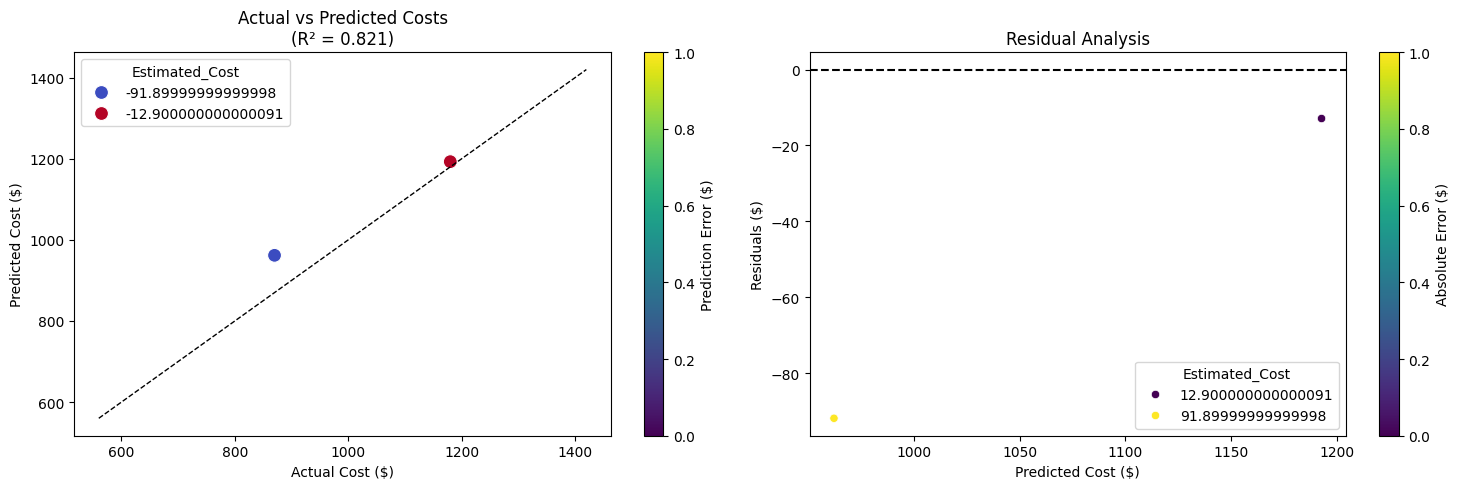

<ipython-input-19-4ac2fbd63f9e>:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_imp, y=feature_imp.index, palette='Blues_d')


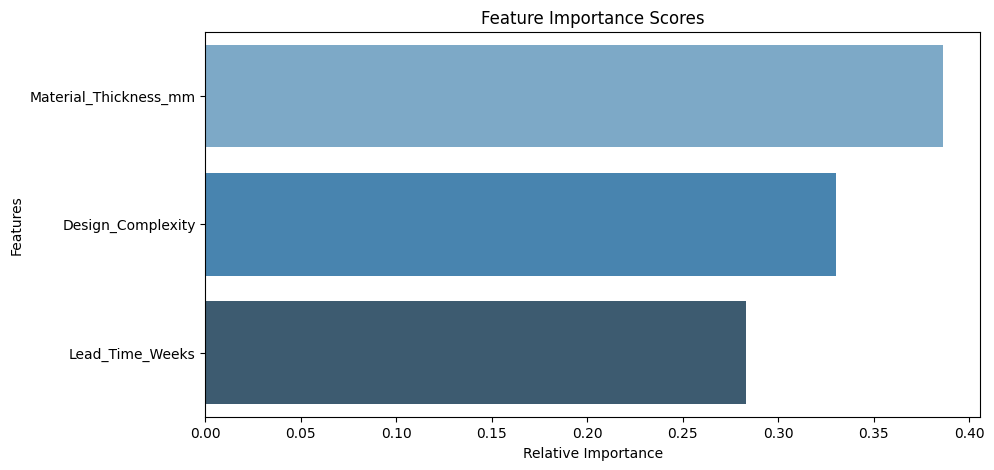


ERROR ANALYSIS FOR TEST SAMPLES:
   Actual  Predicted  Absolute_Error  Percent_Error  Material_Thickness_mm  \
1     870      961.9            91.9      10.563218                    5.0   
0    1180     1192.9            12.9       1.093220                    3.2   

   Design_Complexity  Lead_Time_Weeks  
1                  3                2  
0                  4                3  

SAMPLE PREDICTIONS:
Case 1: $961.90 (Thickness: 5.0mm, Complexity: 3, Lead Time: 2 weeks)
Case 2: $1098.10 (Thickness: 2.5mm, Complexity: 5, Lead Time: 1 weeks)
Case 3: $816.90 (Thickness: 8.0mm, Complexity: 2, Lead Time: 4 weeks)


In [19]:
# ==============================================
# COMPLETE MODEL TRAINING & EVALUATION
# ==============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Load your data (replace with your actual data loading)
# df = pd.read_csv('your_data.csv')

# Sample data creation if needed
if 'df' not in locals():
    print("Creating sample data for demonstration...")
    data = {
        'Material_Thickness_mm': [3.2, 5.0, 8.5, 4.1, 6.7, 2.8, 7.3],
        'Design_Complexity': [4, 3, 2, 5, 3, 4, 2],
        'Lead_Time_Weeks': [3, 2, 1, 4, 2, 3, 1],
        'Estimated_Cost': [1180, 870, 560, 1420, 920, 1250, 600]
    }
    df = pd.DataFrame(data)

# 2. Prepare data
X = df[['Material_Thickness_mm', 'Design_Complexity', 'Lead_Time_Weeks']]
y = df['Estimated_Cost']

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Make predictions
y_pred = model.predict(X_test)

# ==============================================
# MODEL EVALUATION
# ==============================================

# 1. Calculate Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("╔══════════════════════════════════╗")
print("║        MODEL PERFORMANCE         ║")
print("╠══════════════════════════════════╣")
print(f"║ {'Metric':<20}{'Value':<16}║")
print("╠══════════════════════════════════╣")
print(f"║ {'Mean Absolute Error':<20}${mae:.2f}{' '*(14-len(f'{mae:.2f}'))}║")
print(f"║ {'Root Mean Squared Error':<20}${rmse:.2f}{' '*(14-len(f'{rmse:.2f}'))}║")
print(f"║ {'R-squared (R²)':<20}{r2:.3f}{' '*(15-len(f'{r2:.3f}'))}║")
print("╚══════════════════════════════════╝")

# 2. Visual Evaluation
plt.figure(figsize=(15, 5))

# Actual vs Predicted Plot
ax1 = plt.subplot(1, 2, 1) # Get the axes object
scatter_plot = sns.scatterplot(x=y_test, y=y_pred, hue=y_test-y_pred, palette='coolwarm', s=100, ax=ax1) # Pass the axes
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', linewidth=1)
plt.xlabel("Actual Cost ($)")
plt.ylabel("Predicted Cost ($)")
plt.title(f"Actual vs Predicted Costs\n(R² = {r2:.3f})")
# Create the colorbar explicitly from the scatter plot's mappable object
plt.colorbar(scatter_plot.collections[0], label='Prediction Error ($)')


# Calculate residuals BEFORE plotting them
residuals = y_test - y_pred

# Residual Plot
ax2 = plt.subplot(1, 2, 2) # Get the axes object
residual_plot = sns.scatterplot(x=y_pred, y=residuals, hue=abs(residuals), palette='viridis', ax=ax2) # Pass the axes
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel("Predicted Cost ($)")
plt.ylabel("Residuals ($)")
plt.title("Residual Analysis")
# Create the colorbar explicitly for the residual plot
plt.colorbar(residual_plot.collections[0], label='Absolute Error ($)')

plt.tight_layout()
plt.show()

# 3. Feature Importance Analysis
feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_imp, y=feature_imp.index, palette='Blues_d')
plt.title("Feature Importance Scores")
plt.xlabel("Relative Importance")
plt.ylabel("Features")
plt.show()

# 4. Error Analysis Table
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Absolute_Error': abs(y_test - y_pred),
    'Percent_Error': (abs(y_test - y_pred)/y_test*100)
}).join(X_test)

print("\nERROR ANALYSIS FOR TEST SAMPLES:")
print(results.sort_values('Absolute_Error', ascending=False).head())

# 5. Sample Predictions
sample_data = [
    [5.0, 3, 2],   # Medium thickness, medium complexity, standard lead time
    [2.5, 5, 1],    # Thin material, complex design, rush order
    [8.0, 2, 4]     # Thick material, simple design, long lead time
]

# Ensure sample_data is a DataFrame for prediction
sample_data_df = pd.DataFrame(sample_data, columns=X.columns)

sample_pred = model.predict(sample_data_df)

print("\nSAMPLE PREDICTIONS:")
for i, pred in enumerate(sample_pred):
    print(f"Case {i+1}: ${pred:.2f} (Thickness: {sample_data[i][0]}mm, "
          f"Complexity: {sample_data[i][1]}, Lead Time: {sample_data[i][2]} weeks)")